In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
runs =[
    "run-no-ambig", "run-with-ambig-orig", "run-general-ambig",
    "run-no-ambig-0.05-expand", "run-with-ambig-0.05-expand-orig", "run-general-ambig-0.05-expand",
    "run-no-ambig-0.2-expand", "run-with-ambig-0.2-expand", "run-general-ambig-0.2-expand","run-water-refine",
    "run-with-ambig", "run-with-ambig-0.05-expand",
    "run-cg-with-lig", "run-cg-water"
]   
succes_list = ['3J95', '3J96', '5GRS', '5HNY', '5WCB', '6ACG', '6AHF', '6IRF', '6N1Q', '6N7G', '6N8Z', '6R7I', '6UBY', '6UC0']

tick_label_dict ={
    "run-no-ambig" : "1",
    "run-with-ambig-orig" : "2",
    "run-general-ambig" : "3",
    "run-no-ambig-0.05-expand" : "4",
    "run-with-ambig-0.05-expand-orig" : "5",
    "run-general-ambig-0.05-expand" : "6",
    "run-no-ambig-0.2-expand" : "7",
    "run-with-ambig-0.2-expand" : "8",
    "run-general-ambig-0.2-expand" : "9",
    "run-cg" : "coarse grained",
    "run-cg2" : "coarse grained 2",
    "run-cg-with-lig" : "13",
    "run-water-refine" : "10",
    'run-no-ambig-0.05-expand-EM' : "it1 no restraints 0.05 expand EM",
    'run-with-ambig-0.05-expand-EM' : "it1 with restraints 0.05 expand EM",
    'run-general-ambig-0.05-expand-EM' : "it1 general restraints 0.05 expand EM",
    "run-cg-water" : "14",
    "run-general-ambig-EM" : "it1 gr + EM",
    "run-with-ambig" : "11",
    "run-with-ambig-0.05-expand" : "12"
}

def make_tick_labels(runs):
    tick_labels = []
    for run in runs:
        tick_labels.append(tick_label_dict[run])
    return tick_labels

In [3]:
def get_ref_secondary():
    """returns a DataFrame containing all the reference structure values"""
    ref_df = pd.read_csv("analysis/reference-secondary.csv", index_col = 0)
  
    return ref_df

def make_secondary_df(run):
    run = "analysis_{}".format(run)
    
    df_3J95 = pd.read_csv(("analysis/{}/3J95_secondary.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("analysis/{}/3J96_secondary.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("analysis/{}/5GRS_secondary.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("analysis/{}/5HNY_secondary.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("analysis/{}/5WCB_secondary.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("analysis/{}/6ACG_secondary.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("analysis/{}/6AHF_secondary.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("analysis/{}/6IRF_secondary.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("analysis/{}/6N1Q_secondary.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("analysis/{}/6N7G_secondary.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("analysis/{}/6N8Z_secondary.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("analysis/{}/6R7I_secondary.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("analysis/{}/6UBY_secondary.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("analysis/{}/6UC0_secondary.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

In [4]:
def combine_dfs(analyzer):
    final_df = pd.DataFrame()
    for run in runs:
        df_list = make_secondary_df(run)
        data_frame = pd.DataFrame()
        for df in iter(df_list):
            if df.shape[0] != 0:
                structure = df.index[0][:4]
                if structure in succes_list:
                    df = df.sort_values("HADDOCK-score").reset_index().drop("structure", axis=1)
#                     df = df.sub(ref_df.loc[structure, analyzer])
                    data_frame = pd.concat([data_frame, df[analyzer]], ignore_index=True)
        final_df = pd.concat([final_df, data_frame], axis=1, ignore_index=True)
    return final_df

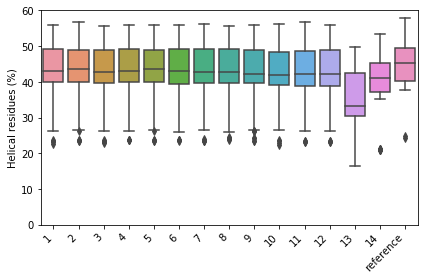

In [5]:
analyzer ="Helix"
ana_df = combine_dfs(analyzer)
ref_df = get_ref_secondary()
ref_df
ref_df = ref_df.loc[succes_list, analyzer]
df_helix = pd.concat([ana_df, ref_df], axis=1, ignore_index=True)
xticks = make_tick_labels(runs)
xticks.append("reference")

plot = sns.boxplot(data = df_helix)
plot.set_xticklabels(xticks, rotation=45, ha="right")
plot.set_ylabel("Helical residues (%)")
plot.set_ylim([0,60])
plt.tight_layout()

In [6]:
make_secondary_df("run-with-ambig-0.05-expand")

[              HADDOCK-score  Helix  Sheet  unordered
 structure                                           
 3J95_5w.pdb     -1606.61890   48.6   10.1       41.3
 3J95_16w.pdb    -1548.15620   49.4   10.1       40.5
 3J95_11w.pdb    -1513.75713   48.3    9.9       41.8
 3J95_19w.pdb    -1483.19944   47.7   10.0       42.2,
               HADDOCK-score  Helix  Sheet  unordered
 structure                                           
 3J96_6w.pdb     -3657.93593   48.9   14.0       37.1
 3J96_13w.pdb    -3654.73717   49.1   13.9       37.0
 3J96_14w.pdb    -3636.85825   48.4   14.0       37.6
 3J96_10w.pdb    -3601.99753   48.9   13.8       37.3,
               HADDOCK-score  Helix  Sheet  unordered
 structure                                           
 5GRS_45w.pdb   -2322.694375   23.0   30.4       46.5
 5GRS_15w.pdb   -2320.080330   23.4   29.8       46.8
 5GRS_44w.pdb   -2301.007961   23.3   31.0       45.7
 5GRS_2w.pdb    -2286.983512   23.1   30.6       46.2,
               HADDOCK-sc

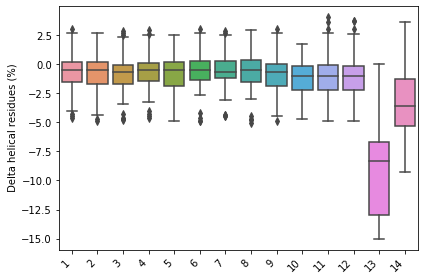

In [7]:
i = 0
new_df = pd.DataFrame()
while i < ana_df.shape[0]:
    ana_slice = ana_df[i:i+4].sub(ref_df.iloc[int(i/4)])
    new_df = pd.concat([new_df, ana_slice])
    
    i += 4
df_helix = new_df
xticks = make_tick_labels(runs)
xticks.append("reference")

plot = sns.boxplot(data = df_helix)
plot.set_xticklabels(xticks, rotation=45, ha="right")
plot.set_ylabel(" Delta helical residues (%)")
plt.tight_layout()

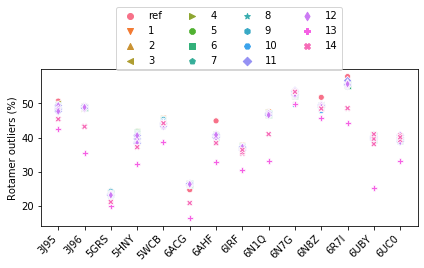

In [8]:
all_df = pd.DataFrame()
ref_df = pd.DataFrame(ref_df.values, columns=["ref"])
ref_df.set_index([succes_list], inplace=True)
all_df = pd.concat([all_df, ref_df], axis = 1)

for i in range(ana_df.shape[1]):
    j = 0
    df = pd.DataFrame()
    while j < ana_df.shape[0]:
        part = ana_df.iloc[j:j+4, i]
        df = pd.concat([df, part.reset_index().drop("index", axis=1)], axis=1, )
        j += 4
    df = pd.DataFrame.transpose(df)
    column = xticks[i]
    df = pd.DataFrame(df.values, columns=[column, column, column, column])
    df.set_index([succes_list], inplace=True)
    all_df = pd.concat([all_df, df], axis = 1)

# colors = [
#     "#000000",
#     "#666666",
#     "#FF0000",
#     "#FFFF00",
#     "#006666",
#     "#00CCCC",
#     "#00FF00",
#     "#0000FF",
#     "#9900CC",
#     "#9966FF",
#     "#FF0099",
#     "#FF99FF"
# ]    

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plot = sns.scatterplot(data=all_df, markers=filled_markers)
plot.legend(loc='center', bbox_to_anchor=(0.5, 1.2), ncol=4)
plot.set_xticklabels(succes_list, rotation=45, ha="right")
plot.set_ylabel("Rotamer outliers (%)")
plt.tight_layout()
plt.savefig("Helix-each", dpi = 350)

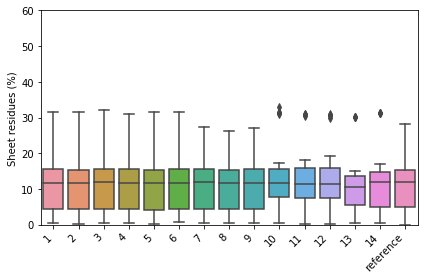

In [9]:
analyzer ="Sheet"
ana_df = combine_dfs(analyzer)
ref_df = get_ref_secondary()
ref_df
ref_df = ref_df.loc[succes_list, analyzer]
df_sheet = pd.concat([ana_df, ref_df], axis=1, ignore_index=True)
xticks = make_tick_labels(runs)
xticks.append("reference")

plot = sns.boxplot(data = df_sheet)
plot.set_xticklabels(xticks, rotation=45, ha="right")
plot.set_ylabel("Sheet residues (%)")
plot.set_ylim([0,60])
plt.tight_layout()

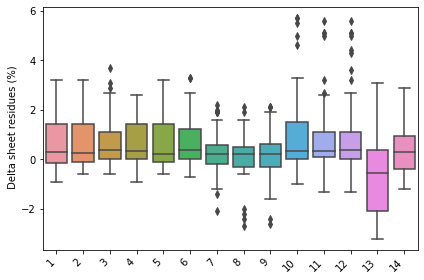

In [10]:
i = 0
new_df = pd.DataFrame()
while i < ana_df.shape[0]:
    ana_slice = ana_df[i:i+4].sub(ref_df.iloc[int(i/4)])
    new_df = pd.concat([new_df, ana_slice])
    
    i += 4
df_sheet = new_df
xticks = make_tick_labels(runs)
xticks.append("reference")

plot = sns.boxplot(data = df_sheet)
plot.set_xticklabels(xticks, rotation=45, ha="right")
plot.set_ylabel(" Delta sheet residues (%)")
plt.tight_layout()

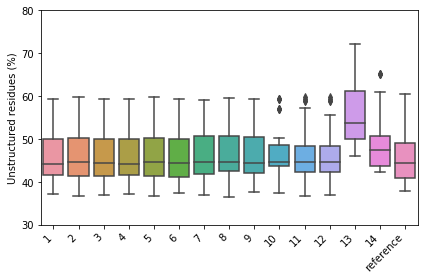

In [11]:
analyzer ="unordered"
ana_df = combine_dfs(analyzer)
ref_df = get_ref_secondary()
ref_df
ref_df = ref_df.loc[succes_list, analyzer]
df_unstruct = pd.concat([ana_df, ref_df], axis=1, ignore_index=True)
xticks = make_tick_labels(runs)
xticks.append("reference")

plot = sns.boxplot(data = df_unstruct)
plot.set_xticklabels(xticks, rotation=45, ha="right")
plot.set_ylabel("Unstructured residues (%)")
plot.set_ylim([30,80])
plt.tight_layout()

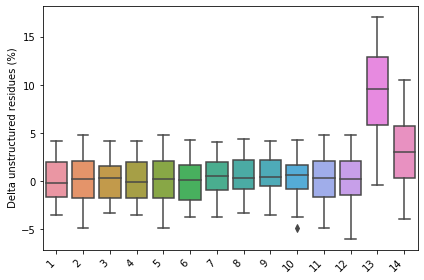

In [12]:
i = 0
new_df = pd.DataFrame()
while i < ana_df.shape[0]:
    ana_slice = ana_df[i:i+4].sub(ref_df.iloc[int(i/4)])
    new_df = pd.concat([new_df, ana_slice])
    
    i += 4
df_unstruct = new_df
xticks = make_tick_labels(runs)
xticks.append("reference")

plot = sns.boxplot(data = df_unstruct)
plot.set_xticklabels(xticks, rotation=45, ha="right")
plot.set_ylabel(" Delta unstructured residues (%)")
plt.tight_layout()

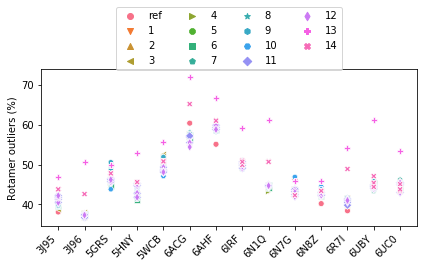

In [13]:
all_df = pd.DataFrame()
ref_df = pd.DataFrame(ref_df.values, columns=["ref"])
ref_df.set_index([succes_list], inplace=True)
all_df = pd.concat([all_df, ref_df], axis = 1)

for i in range(ana_df.shape[1]):
    j = 0
    df = pd.DataFrame()
    while j < ana_df.shape[0]:
        part = ana_df.iloc[j:j+4, i]
        df = pd.concat([df, part.reset_index().drop("index", axis=1)], axis=1, )
        j += 4
    df = pd.DataFrame.transpose(df)
    column = xticks[i]
    df = pd.DataFrame(df.values, columns=[column, column, column, column])
    df.set_index([succes_list], inplace=True)
    all_df = pd.concat([all_df, df], axis = 1)

# colors = [
#     "#000000",
#     "#666666",
#     "#FF0000",
#     "#FFFF00",
#     "#006666",
#     "#00CCCC",
#     "#00FF00",
#     "#0000FF",
#     "#9900CC",
#     "#9966FF",
#     "#FF0099",
#     "#FF99FF"
# ]    

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plot = sns.scatterplot(data=all_df, markers=filled_markers)
plot.legend(loc='center', bbox_to_anchor=(0.5, 1.2), ncol=4)
plot.set_xticklabels(succes_list, rotation=45, ha="right")
plot.set_ylabel("Rotamer outliers (%)")
plt.tight_layout()
# plt.savefig("Rotamer-each", dpi = 350)

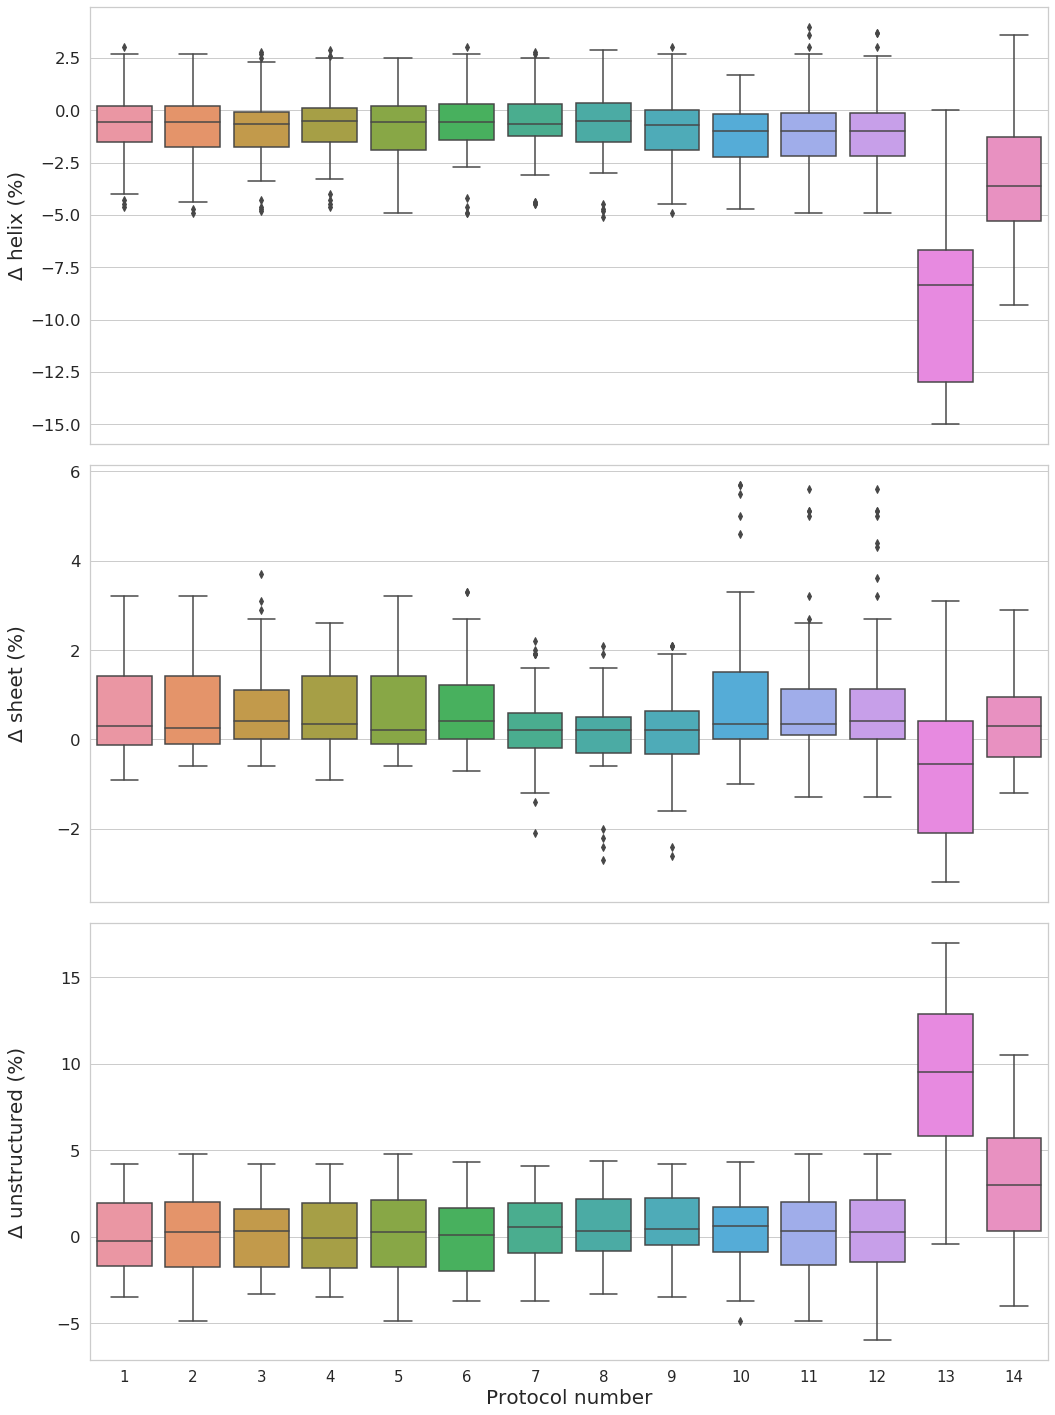

In [15]:
boxes = df_sheet.shape[1]

fig, ax = plt.subplots(nrows=3, figsize=(15,20))
sns.set(font_scale=1.5, style="whitegrid")

# fill the plots
helix_plot = sns.boxplot(data=df_helix, ax=ax[0])
sheet_plot = sns.boxplot(data=df_sheet, ax=ax[1])
unstruct_plot = sns.boxplot(data=df_unstruct, ax=ax[2])

# cor_plot.set_title("Top 4 analysis of {} cryo-EM models".format(len(succes_list)), fontsize = 30)

xticks = make_tick_labels(runs)
helix_plot.set_xticks([])
sheet_plot.set_xticks([])
unstruct_plot.set_xticklabels(xticks, fontsize=15)

helix_plot.set_ylabel("Δ helix (%)", fontsize=20)
sheet_plot.set_ylabel("Δ sheet (%)", fontsize=20)
unstruct_plot.set_ylabel("Δ unstructured (%)", fontsize=20)
unstruct_plot.set_xlabel("Protocol number", fontsize=20)


# plt.setp(rama_plot, ylim=[-0.05, 0.020])
# plt.setp(clash_plot, ylim=[-1, 45])
# plt.setp(time_plot, ylim=[0, 3500])

fig.align_ylabels(ax[:])
plt.tight_layout()
plt.savefig("all-secondary", dpi=300)